# Import Module & Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
upload = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [3]:
df = pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Problem Statement

Mengidentifikasi customer yang akan membuka deposito agar user marketing menjadi lebih efisien dalam proses customer approachment.

Text(0.5, 1.0, 'Customer with Deposito')

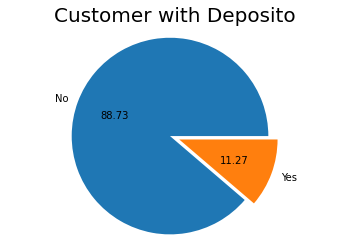

In [4]:
plt.pie(df['y'].value_counts(),labels = ['No','Yes'],autopct='%.2f',explode=(0.1,0))
plt.axis('equal')
plt.title('Customer with Deposito',size = 20)


In [5]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# Find the correlation between features and target

## Encode Categorical Data

In [6]:
df_enc = df.copy()
df_enc['y'] = df_enc['y'].map({'no':0, 'yes':1})
df_enc['marital']= df_enc['marital'].map({'married':1, 'single':2,'divorced':3})
df_enc['education']= df_enc['education'].map({'basic.4y':1, 'high.school':2,
                                              'basic.6y':3,'basic.9y':4,
                                              'professional.course':5,'university.degree':6,'illiterate':7})
df_enc['housing']= df_enc['housing'].map({'yes':1,'no':0,})
df_enc['job']= df_enc['job'].map({'housemaid':1, 'services':2,'admin.':3,'blue-collar':4,
                                  'technician':5,'retired':6,'management':7,'unemployed':8,
                                  'self-employed':9,'entrepreneur':10,'student':11})
df_enc['loan']= df_enc['loan'].map({'yes':1, 'no':0})
df_enc['contact']=df_enc['contact'].map({'telephone':1, 'cellular':0})
df_enc['month']= df_enc['month'].map({'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,
                                      'sep':9,'oct':10,'nov':11,'dec':12})
df_enc['day_of_week']= df_enc['day_of_week'].map({'mon':1,'tue':2,'wed':3,'thu':4,
                                      'fri':5,})
df_enc['poutcome']= df_enc['poutcome'].map({'failure':0,'success':1,'nonexistent':2,})

Catgorical data di mapping menjadi numeric. Tujuannya adalah untuk mencari korelasi dengan target. 

## Create a correlation map

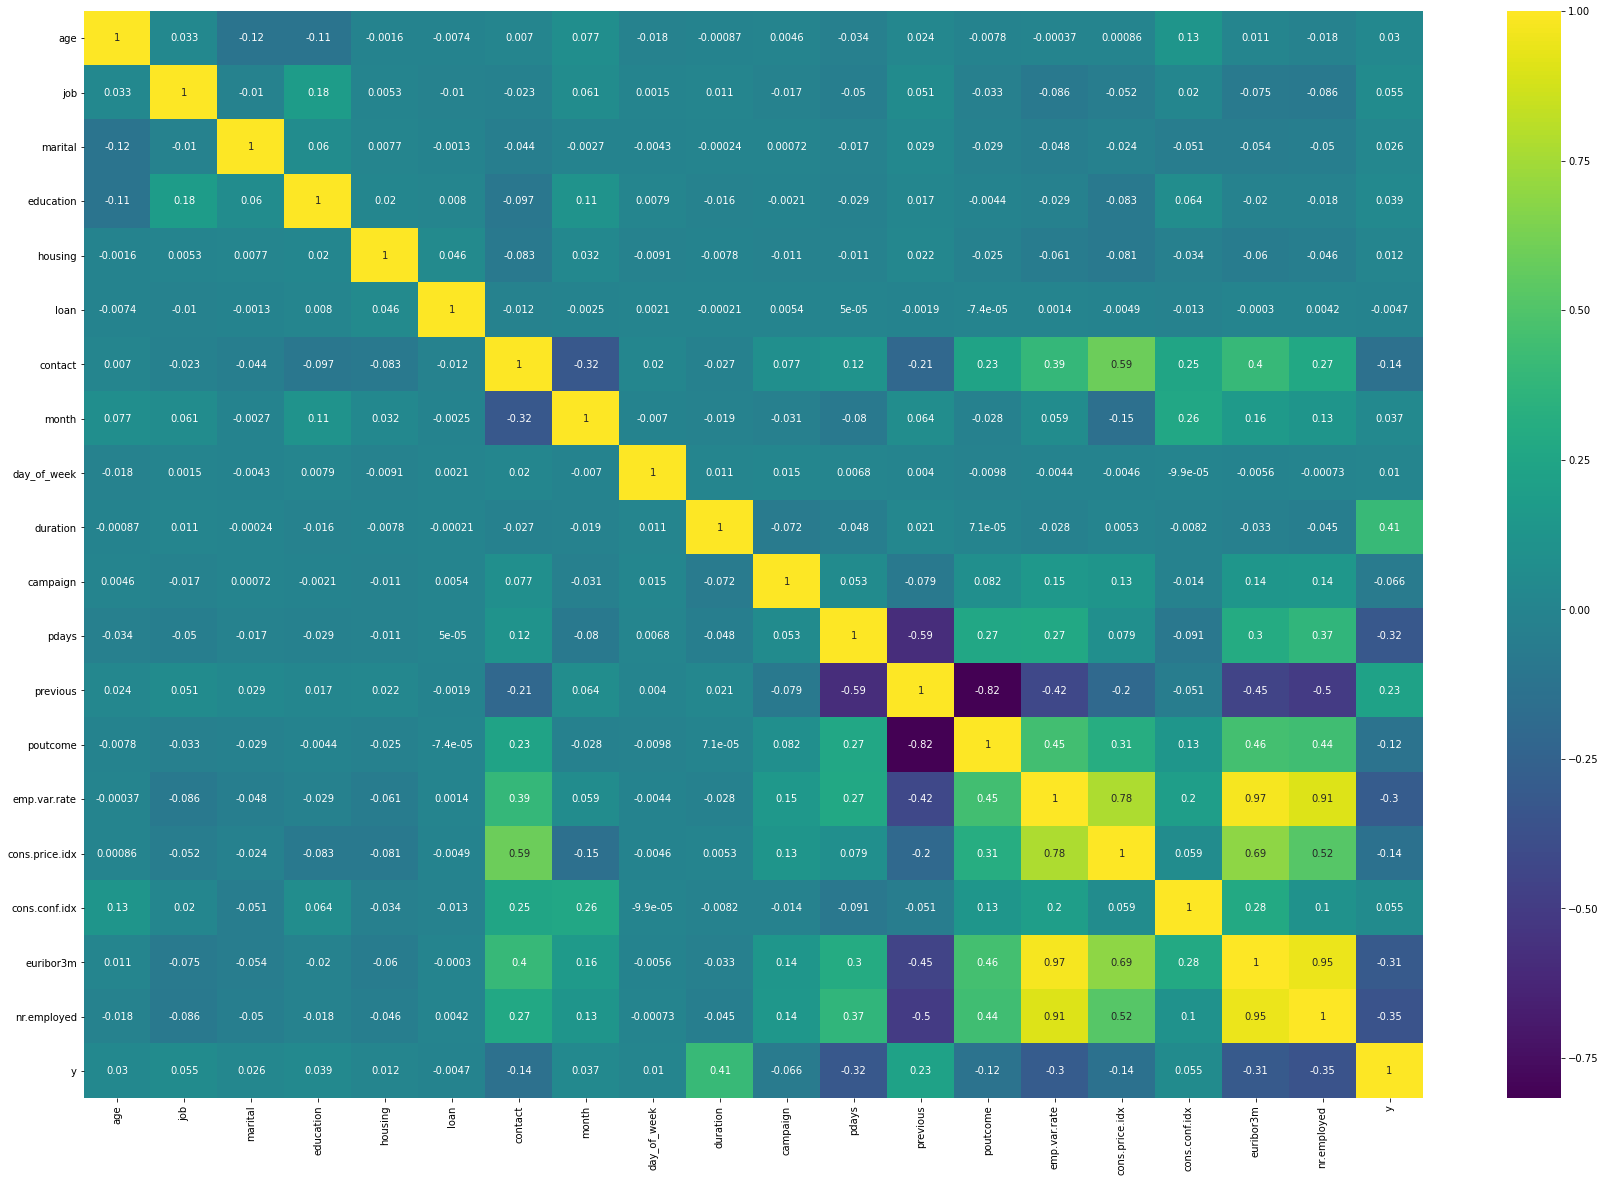

In [7]:
plt.figure(figsize=(30,20))
sns.heatmap(df_enc.corr(), annot = True, cmap = 'viridis')
plt.show()

Berdasarkan correlation map diketahui bahwa target memiliki nilai korelasi tertinggi dengan feature duration.

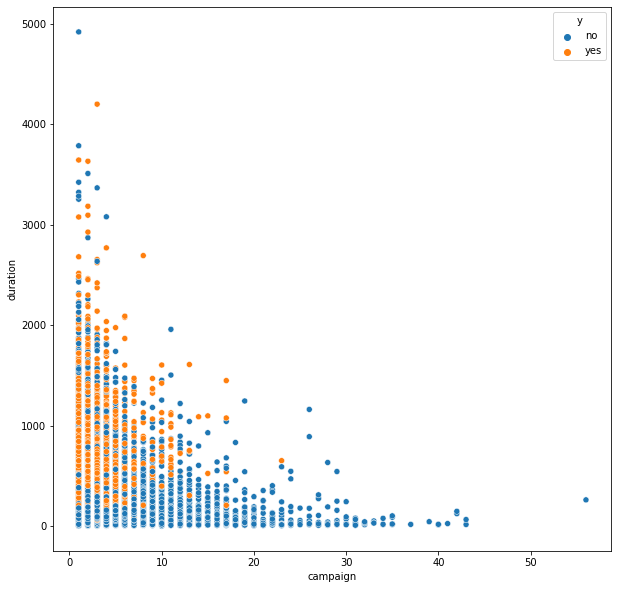

In [8]:
plt.figure(figsize=(10,10))
sns.scatterplot( x="campaign", y="duration", data=df, hue='y')

Kesimpulan
1. Semakin besar durationnya maka probability untuk deposit semakin besar
2. Durasi semakin berkurang semakin banyaknya campaign yang dilakukan (campaign = number of contacts performed during this campaign and for this client)
3. Awal campaign dilakukan merupakan opportunity terbesar untuk mendapatkan deposit

# Data Cardinalities

In [9]:
categorical_data = df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]
for a in categorical_data:
  print(a,df[a].unique(),sep='\n')
  print('--'*20)

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
----------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------------------
default
['no' 'unknown' 'yes']
----------------------------------------
housing
['no' 'yes' 'unknown']
----------------------------------------
loan
['no' 'yes' 'unknown']
----------------------------------------
contact
['telephone' 'cellular']
----------------------------------------
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
----------------------------------------
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
----------------------------------------
poutcome
['nonexistent' 'failure' 'success']
----------------------

In [10]:
df1 = df.copy()

##Job

### Job Value Analysis

In [181]:
import matplotlib.pyplot as plt
import pandas as pd

In [182]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [183]:
df1['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [184]:
df1['job'].value_counts()[0]

10422

In [185]:
df1['job'].value_counts().index.tolist()

['admin.',
 'blue-collar',
 'technician',
 'services',
 'management',
 'retired',
 'entrepreneur',
 'self-employed',
 'housemaid',
 'unemployed',
 'student',
 'unknown']

In [186]:
df1['job'][df1['y'] =='yes'].value_counts()

admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64

In [187]:
index_job = df1['job'].value_counts().index.tolist()
value_job = []
for i in range(0,len(index_job),1):
  value_job.append(df1['job'].value_counts()[i])

In [188]:
value_job

[10422, 9254, 6743, 3969, 2924, 1720, 1456, 1421, 1060, 1014, 875, 330]

In [189]:
index_job

['admin.',
 'blue-collar',
 'technician',
 'services',
 'management',
 'retired',
 'entrepreneur',
 'self-employed',
 'housemaid',
 'unemployed',
 'student',
 'unknown']

In [190]:
df1['job'][df1['y'] =='no'].value_counts()

admin.           9070
blue-collar      8616
technician       6013
services         3646
management       2596
entrepreneur     1332
retired          1286
self-employed    1272
housemaid         954
unemployed        870
student           600
unknown           293
Name: job, dtype: int64

In [191]:
value_count_job_no = []
for i in range(0,len(index_job),1):
  value_count_job_no.append(len(df1[(df1['job'] == index_job[i]) & (df1['y'] == 'no')]))

In [192]:
value_count_job_no

[9070, 8616, 6013, 3646, 2596, 1286, 1332, 1272, 954, 870, 600, 293]

In [193]:
value_count_job_yes = []
for i in range(0,len(index_job),1):
  value_count_job_yes.append(len(df1[(df1['job'] == index_job[i]) & (df1['y'] == 'yes')]))

In [194]:
value_count_job_yes

[1352, 638, 730, 323, 328, 434, 124, 149, 106, 144, 275, 37]

In [195]:
data_job = {'nama_job': index_job,'nilai_job':value_job,
            'nilai_job_yes':value_count_job_yes,
            'nilai_job_no':value_count_job_no}
job = pd.DataFrame(data_job)

In [196]:
job

,nama_job,nilai_job,nilai_job_yes,nilai_job_no
0,admin.,10422,1352,9070
1,blue-collar,9254,638,8616
2,technician,6743,730,6013
3,services,3969,323,3646
4,management,2924,328,2596
5,retired,1720,434,1286
6,entrepreneur,1456,124,1332
7,self-employed,1421,149,1272
8,housemaid,1060,106,954
9,unemployed,1014,144,870


In [197]:
def presentase(job,yes):
  presentase_value = []
  for i in range(0,len(job),1):
    presentase_value.append(round(((yes[i]/job[i])*100),4))
  return presentase_value

In [198]:
value_presentase_perjob_vs_job_yes = presentase((job['nilai_job']),job['nilai_job_yes'])

In [199]:
job['nilai_presentase_job_vs_yes']= value_presentase_perjob_vs_job_yes

In [200]:
value_presentase_perjob_vs_no = []
for i in job.index:
  value_presentase_perjob_vs_no.append(100 - job['nilai_presentase_job_vs_yes'][i])

In [201]:
data_job = {'nama_job': index_job,'nilai_job':value_job,
            'nilai_job_yes':value_count_job_yes,
            'nilai_job_no':value_count_job_no,
            'nilai_presentase_job_vs_yes':value_presentase_perjob_vs_job_yes,
            'nilai_presentase_job_vs_no':value_presentase_perjob_vs_no}

In [202]:
job = pd.DataFrame(data_job)

In [203]:
job

,nama_job,nilai_job,nilai_job_yes,nilai_job_no,nilai_presentase_job_vs_yes,nilai_presentase_job_vs_no
0,admin.,10422,1352,9070,12.9726,87.0274
1,blue-collar,9254,638,8616,6.8943,93.1057
2,technician,6743,730,6013,10.8260,89.1740
3,services,3969,323,3646,8.1381,91.8619
4,management,2924,328,2596,11.2175,88.7825
5,retired,1720,434,1286,25.2326,74.7674
6,entrepreneur,1456,124,1332,8.5165,91.4835
7,self-employed,1421,149,1272,10.4856,89.5144
8,housemaid,1060,106,954,10.0000,90.0000
9,unemployed,1014,144,870,14.2012,85.7988


###Piechart Job

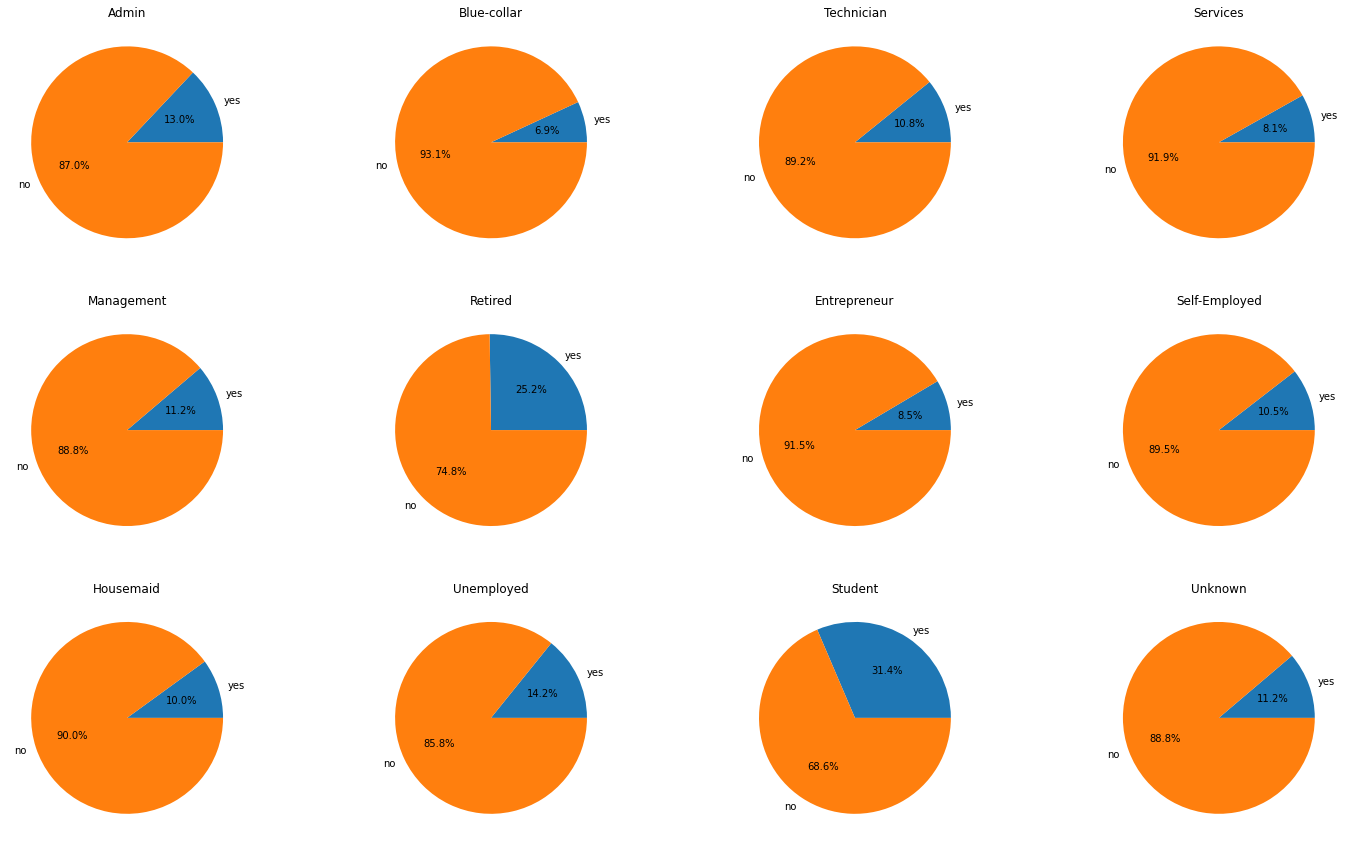

In [204]:
fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(25,15))

axes[0,0].pie([job['nilai_presentase_job_vs_yes'][0],job['nilai_presentase_job_vs_no'][0]],labels=['yes','no'], autopct='%1.1f%%')
axes[0,0].set_title('Admin')

axes[0,1].pie([job['nilai_presentase_job_vs_yes'][1],job['nilai_presentase_job_vs_no'][1]],labels=['yes','no'], autopct='%1.1f%%')
axes[0,1].set_title('Blue-collar')

axes[0,2].pie([job['nilai_presentase_job_vs_yes'][2],job['nilai_presentase_job_vs_no'][2]],labels=['yes','no'], autopct='%1.1f%%')
axes[0,2].set_title('Technician')

axes[0,3].pie([job['nilai_presentase_job_vs_yes'][3],job['nilai_presentase_job_vs_no'][3]],labels=['yes','no'], autopct='%1.1f%%')
axes[0,3].set_title('Services')

axes[1,0].pie([job['nilai_presentase_job_vs_yes'][4],job['nilai_presentase_job_vs_no'][4]],labels=['yes','no'], autopct='%1.1f%%')
axes[1,0].set_title('Management')

axes[1,1].pie([job['nilai_presentase_job_vs_yes'][5],job['nilai_presentase_job_vs_no'][5]],labels=['yes','no'], autopct='%1.1f%%')
axes[1,1].set_title('Retired')

axes[1,2].pie([job['nilai_presentase_job_vs_yes'][6],job['nilai_presentase_job_vs_no'][6]],labels=['yes','no'], autopct='%1.1f%%')
axes[1,2].set_title('Entrepreneur')

axes[1,3].pie([job['nilai_presentase_job_vs_yes'][7],job['nilai_presentase_job_vs_no'][7]],labels=['yes','no'], autopct='%1.1f%%')
axes[1,3].set_title('Self-Employed')

axes[2,0].pie([job['nilai_presentase_job_vs_yes'][8],job['nilai_presentase_job_vs_no'][8]],labels=['yes','no'], autopct='%1.1f%%')
axes[2,0].set_title('Housemaid')

axes[2,1].pie([job['nilai_presentase_job_vs_yes'][9],job['nilai_presentase_job_vs_no'][9]],labels=['yes','no'], autopct='%1.1f%%')
axes[2,1].set_title('Unemployed')

axes[2,2].pie([job['nilai_presentase_job_vs_yes'][10],job['nilai_presentase_job_vs_no'][10]],labels=['yes','no'], autopct='%1.1f%%')
axes[2,2].set_title('Student')

axes[2,3].pie([job['nilai_presentase_job_vs_yes'][11],job['nilai_presentase_job_vs_no'][11]],labels=['yes','no'], autopct='%1.1f%%')
axes[2,3].set_title('Unknown')

plt.show()

##Default

### Default Analysis Value

In [399]:
df1 = df.copy()
index_default = df1['default'].value_counts().index.tolist()
value_default = []
for i in range(0,len(index_default),1):
  value_default.append(df1['default'].value_counts()[i])

In [400]:
value_count_default_no = []
for i in range(0,len(index_default),1):
  value_count_default_no.append(len(df1[(df1['default'] == index_default[i]) & (df1['y'] == 'no')]))

In [401]:
value_count_default_yes = []
for i in range(0,len(index_default),1):
  value_count_default_yes.append(len(df1[(df1['default'] == index_default[i]) & (df1['y'] == 'yes')]))

In [402]:
data_default = {'nama_default': index_default,'nilai_default':value_default,
            'nilai_default_yes':value_count_default_yes,
            'nilai_default_no':value_count_default_no}
default = pd.DataFrame(data_default)

In [403]:
default

,nama_default,nilai_default,nilai_default_yes,nilai_default_no
0,no,32588,4197,28391
1,unknown,8597,443,8154
2,yes,3,0,3


###Piechart Default

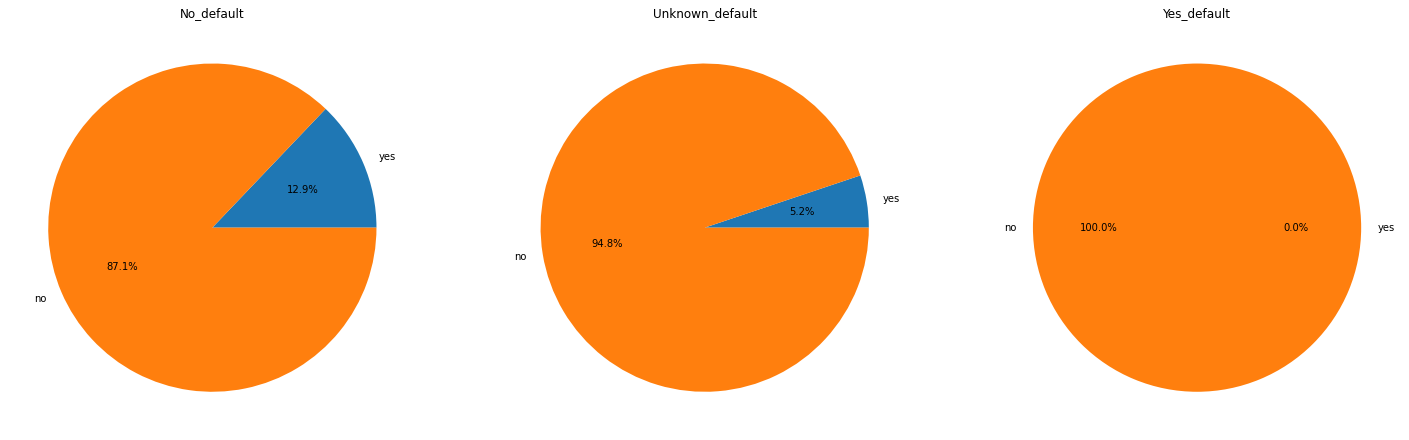

In [222]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(25,15))

axes[0].pie([default['nilai_default_yes'][0],default['nilai_default_no'][0]],labels=['yes','no'], autopct='%1.1f%%')
axes[0].set_title('No_default')

axes[1].pie([default['nilai_default_yes'][1],default['nilai_default_no'][1]],labels=['yes','no'], autopct='%1.1f%%')
axes[1].set_title('Unknown_default')

axes[2].pie([default['nilai_default_yes'][2],default['nilai_default_no'][2]],labels=['yes','no'], autopct='%1.1f%%')
axes[2].set_title('Yes_default')


plt.show()

##Marital

### Marital Value Analysis

In [223]:
index_marital = df1['marital'].value_counts().index.tolist()
value_marital = []
for i in range(0,len(index_marital),1):
  value_marital.append(df1['marital'].value_counts()[i])

In [224]:
value_marital

[24928, 11568, 4612, 80]

In [225]:
value_count_marital_no = []
for i in range(0,len(index_marital),1):
  value_count_marital_no.append(len(df1[(df1['marital'] == index_marital[i]) & (df1['y'] == 'no')]))

In [226]:
value_count_marital_no

[22396, 9948, 4136, 68]

In [227]:
value_count_marital_yes = []
for i in range(0,len(index_marital),1):
  value_count_marital_yes.append(len(df1[(df1['marital'] == index_marital[i]) & (df1['y'] == 'yes')]))

In [228]:
value_count_marital_yes

[2532, 1620, 476, 12]

In [229]:
data_marital = {'nama_marital': index_marital,'nilai_marital':value_marital,
            'nilai_marital_yes':value_count_marital_yes,
            'nilai_marital_no':value_count_marital_no}
marital = pd.DataFrame(data_marital)

In [230]:
marital

,nama_marital,nilai_marital,nilai_marital_yes,nilai_marital_no
0,married,24928,2532,22396
1,single,11568,1620,9948
2,divorced,4612,476,4136
3,unknown,80,12,68


In [231]:
def presentase(marital,yes):
  presentase_value = []
  for i in range(0,len(marital),1):
    presentase_value.append(round(((yes[i]/marital[i])*100),4))
  return presentase_value

In [232]:
value_presentase_permarital_vs_marital_yes = presentase((marital['nilai_marital']),marital['nilai_marital_yes'])

In [233]:
marital['nilai_presentase_marital_vs_yes']= value_presentase_permarital_vs_marital_yes

In [234]:
value_presentase_permarital_vs_no = []
for i in marital.index:
  value_presentase_permarital_vs_no.append(100 - marital['nilai_presentase_marital_vs_yes'][i])

In [235]:
data_marital = {'nama_marital': index_marital,'nilai_marital':value_marital,
            'nilai_marital_yes':value_count_marital_yes,
            'nilai_marital_no':value_count_marital_no,
            'nilai_presentase_marital_vs_yes':value_presentase_permarital_vs_marital_yes,
            'nilai_presentase_marital_vs_no':value_presentase_permarital_vs_no}

In [236]:
marital = pd.DataFrame(data_marital)

In [237]:
marital

,nama_marital,nilai_marital,nilai_marital_yes,nilai_marital_no,nilai_presentase_marital_vs_yes,nilai_presentase_marital_vs_no
0,married,24928,2532,22396,10.1573,89.8427
1,single,11568,1620,9948,14.0041,85.9959
2,divorced,4612,476,4136,10.3209,89.6791
3,unknown,80,12,68,15.0000,85.0000


###Piechart Marital

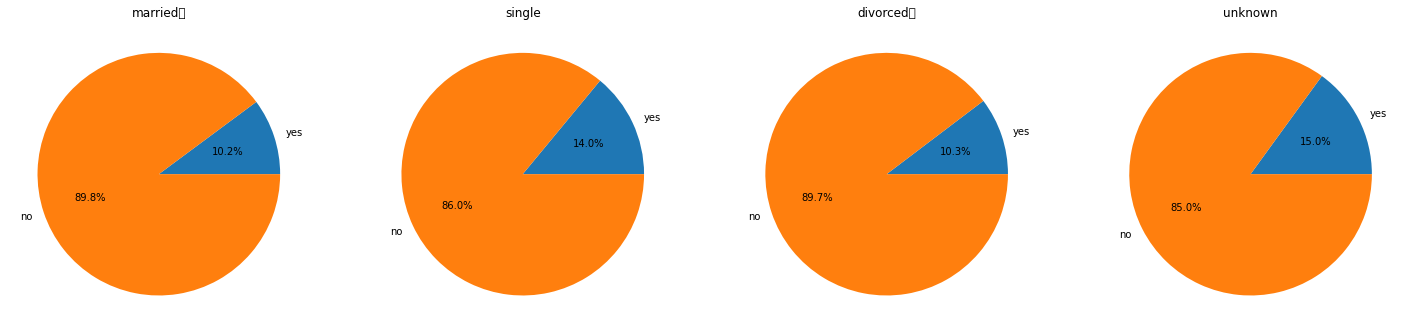

In [238]:
fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(25,15))

axes[0].pie([marital['nilai_presentase_marital_vs_yes'][0],marital['nilai_presentase_marital_vs_no'][0]],labels=['yes','no'], autopct='%1.1f%%')
axes[0].set_title('married	')

axes[1].pie([marital['nilai_presentase_marital_vs_yes'][1],marital['nilai_presentase_marital_vs_no'][1]],labels=['yes','no'], autopct='%1.1f%%')
axes[1].set_title('single')

axes[2].pie([marital['nilai_presentase_marital_vs_yes'][2],marital['nilai_presentase_marital_vs_no'][2]],labels=['yes','no'], autopct='%1.1f%%')
axes[2].set_title('divorced	')

axes[3].pie([marital['nilai_presentase_marital_vs_yes'][3],marital['nilai_presentase_marital_vs_no'][3]],labels=['yes','no'], autopct='%1.1f%%')
axes[3].set_title('unknown')

plt.show()

##Education

### Education Value Analysis

In [239]:
index_education = df1['education'].value_counts().index.tolist()
value_education = []
for i in range(0,len(index_education),1):
  value_education.append(df1['education'].value_counts()[i])

In [240]:
value_education

[12168, 9515, 6045, 5243, 4176, 2292, 1731, 18]

In [241]:
value_count_education_no = []
for i in range(0,len(index_education),1):
  value_count_education_no.append(len(df1[(df1['education'] == index_education[i]) & (df1['y'] == 'no')]))

In [242]:
value_count_education_no

[10498, 8484, 5572, 4648, 3748, 2104, 1480, 14]

In [243]:
value_count_education_yes = []
for i in range(0,len(index_education),1):
  value_count_education_yes.append(len(df1[(df1['education'] == index_education[i]) & (df1['y'] == 'yes')]))

In [244]:
value_count_education_yes

[1670, 1031, 473, 595, 428, 188, 251, 4]

In [245]:
data_education = {'nama_education': index_education,'nilai_education':value_education,
            'nilai_education_yes':value_count_education_yes,
            'nilai_education_no':value_count_education_no}
education = pd.DataFrame(data_education)

In [246]:
education

,nama_education,nilai_education,nilai_education_yes,nilai_education_no
0,university.degree,12168,1670,10498
1,high.school,9515,1031,8484
2,basic.9y,6045,473,5572
3,professional.course,5243,595,4648
4,basic.4y,4176,428,3748
5,basic.6y,2292,188,2104
6,unknown,1731,251,1480
7,illiterate,18,4,14


In [247]:
def presentase(education,yes):
  presentase_value = []
  for i in range(0,len(education),1):
    presentase_value.append(round(((yes[i]/education[i])*100),4))
  return presentase_value

In [248]:
value_presentase_pereducation_vs_education_yes = presentase((education['nilai_education']),education['nilai_education_yes'])

In [249]:
education['nilai_presentase_education_vs_yes']= value_presentase_pereducation_vs_education_yes

In [250]:
value_presentase_pereducation_vs_no = []
for i in education.index:
  value_presentase_pereducation_vs_no.append(100 - education['nilai_presentase_education_vs_yes'][i])

In [251]:
data_education = {'nama_education': index_education,'nilai_education':value_education,
            'nilai_education_yes':value_count_education_yes,
            'nilai_education_no':value_count_education_no,
            'nilai_presentase_education_vs_yes':value_presentase_pereducation_vs_education_yes,
            'nilai_presentase_education_vs_no':value_presentase_pereducation_vs_no}

In [252]:
education = pd.DataFrame(data_education)

In [253]:
education

,nama_education,nilai_education,nilai_education_yes,nilai_education_no,nilai_presentase_education_vs_yes,nilai_presentase_education_vs_no
0,university.degree,12168,1670,10498,13.7245,86.2755
1,high.school,9515,1031,8484,10.8355,89.1645
2,basic.9y,6045,473,5572,7.8246,92.1754
3,professional.course,5243,595,4648,11.3485,88.6515
4,basic.4y,4176,428,3748,10.2490,89.7510
5,basic.6y,2292,188,2104,8.2024,91.7976
6,unknown,1731,251,1480,14.5003,85.4997
7,illiterate,18,4,14,22.2222,77.7778


###Piechart Education

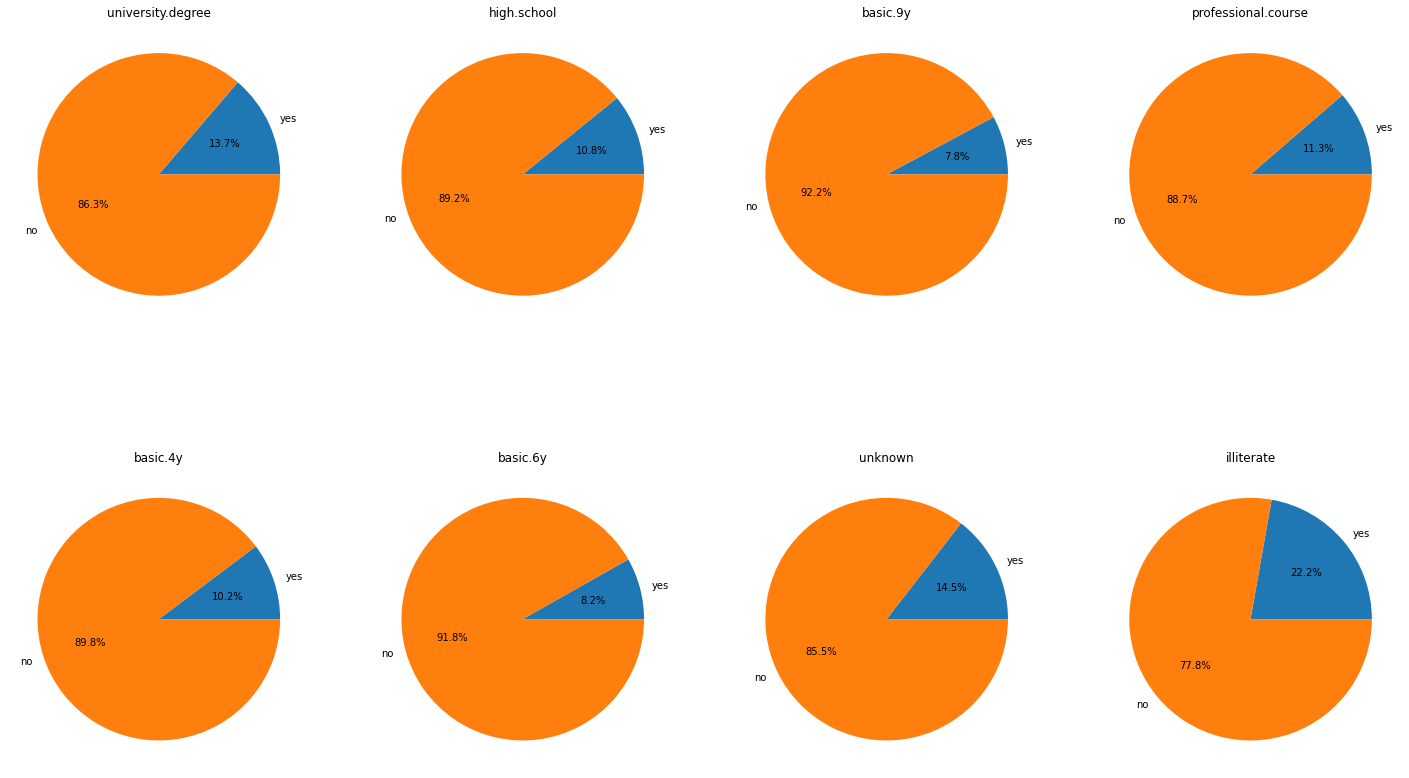

In [254]:
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(25,15))

axes[0,0].pie([education['nilai_presentase_education_vs_yes'][0],education['nilai_presentase_education_vs_no'][0]],labels=['yes','no'], autopct='%1.1f%%')
axes[0,0].set_title(education['nama_education'][0])

axes[0,1].pie([education['nilai_presentase_education_vs_yes'][1],education['nilai_presentase_education_vs_no'][1]],labels=['yes','no'], autopct='%1.1f%%')
axes[0,1].set_title(education['nama_education'][1])

axes[0,2].pie([education['nilai_presentase_education_vs_yes'][2],education['nilai_presentase_education_vs_no'][2]],labels=['yes','no'], autopct='%1.1f%%')
axes[0,2].set_title(education['nama_education'][2])

axes[0,3].pie([education['nilai_presentase_education_vs_yes'][3],education['nilai_presentase_education_vs_no'][3]],labels=['yes','no'], autopct='%1.1f%%')
axes[0,3].set_title(education['nama_education'][3])

axes[1,0].pie([education['nilai_presentase_education_vs_yes'][4],education['nilai_presentase_education_vs_no'][4]],labels=['yes','no'], autopct='%1.1f%%')
axes[1,0].set_title(education['nama_education'][4])

axes[1,1].pie([education['nilai_presentase_education_vs_yes'][5],education['nilai_presentase_education_vs_no'][5]],labels=['yes','no'], autopct='%1.1f%%')
axes[1,1].set_title(education['nama_education'][5])

axes[1,2].pie([education['nilai_presentase_education_vs_yes'][6],education['nilai_presentase_education_vs_no'][6]],labels=['yes','no'], autopct='%1.1f%%')
axes[1,2].set_title(education['nama_education'][6])

axes[1,3].pie([education['nilai_presentase_education_vs_yes'][7],education['nilai_presentase_education_vs_no'][7]],labels=['yes','no'], autopct='%1.1f%%')
axes[1,3].set_title(education['nama_education'][7])

plt.show()

##Housing

### Housing Value Analysis

In [255]:
index_housing = df1['housing'].value_counts().index.tolist()
value_housing = []
for i in range(0,len(index_housing),1):
  value_housing.append(df1['housing'].value_counts()[i])

In [256]:
value_housing

[21576, 18622, 990]

In [257]:
value_count_housing_no = []
for i in range(0,len(index_housing),1):
  value_count_housing_no.append(len(df1[(df1['housing'] == index_housing[i]) & (df1['y'] == 'no')]))

In [258]:
value_count_housing_no

[19069, 16596, 883]

In [259]:
value_count_housing_yes = []
for i in range(0,len(index_housing),1):
  value_count_housing_yes.append(len(df1[(df1['housing'] == index_housing[i]) & (df1['y'] == 'yes')]))

In [260]:
value_count_housing_yes

[2507, 2026, 107]

In [261]:
data_housing = {'nama_housing': index_housing,'nilai_housing':value_housing,
            'nilai_housing_yes':value_count_housing_yes,
            'nilai_housing_no':value_count_housing_no}
housing = pd.DataFrame(data_housing)

In [262]:
housing

,nama_housing,nilai_housing,nilai_housing_yes,nilai_housing_no
0,yes,21576,2507,19069
1,no,18622,2026,16596
2,unknown,990,107,883


In [263]:
def presentase(housing,yes):
  presentase_value = []
  for i in range(0,len(housing),1):
    presentase_value.append(round(((yes[i]/housing[i])*100),4))
  return presentase_value

In [264]:
value_presentase_perhousing_vs_housing_yes = presentase((housing['nilai_housing']),housing['nilai_housing_yes'])

In [265]:
housing['nilai_presentase_housing_vs_yes']= value_presentase_perhousing_vs_housing_yes

In [266]:
value_presentase_perhousing_vs_no = []
for i in housing.index:
  value_presentase_perhousing_vs_no.append(100 - housing['nilai_presentase_housing_vs_yes'][i])

In [267]:
data_housing = {'nama_housing': index_housing,'nilai_housing':value_housing,
            'nilai_housing_yes':value_count_housing_yes,
            'nilai_housing_no':value_count_housing_no,
            'nilai_presentase_housing_vs_yes':value_presentase_perhousing_vs_housing_yes,
            'nilai_presentase_housing_vs_no':value_presentase_perhousing_vs_no}

In [268]:
housing = pd.DataFrame(data_housing)

In [269]:
housing

,nama_housing,nilai_housing,nilai_housing_yes,nilai_housing_no,nilai_presentase_housing_vs_yes,nilai_presentase_housing_vs_no
0,yes,21576,2507,19069,11.6194,88.3806
1,no,18622,2026,16596,10.8796,89.1204
2,unknown,990,107,883,10.8081,89.1919


###Piechart Housing

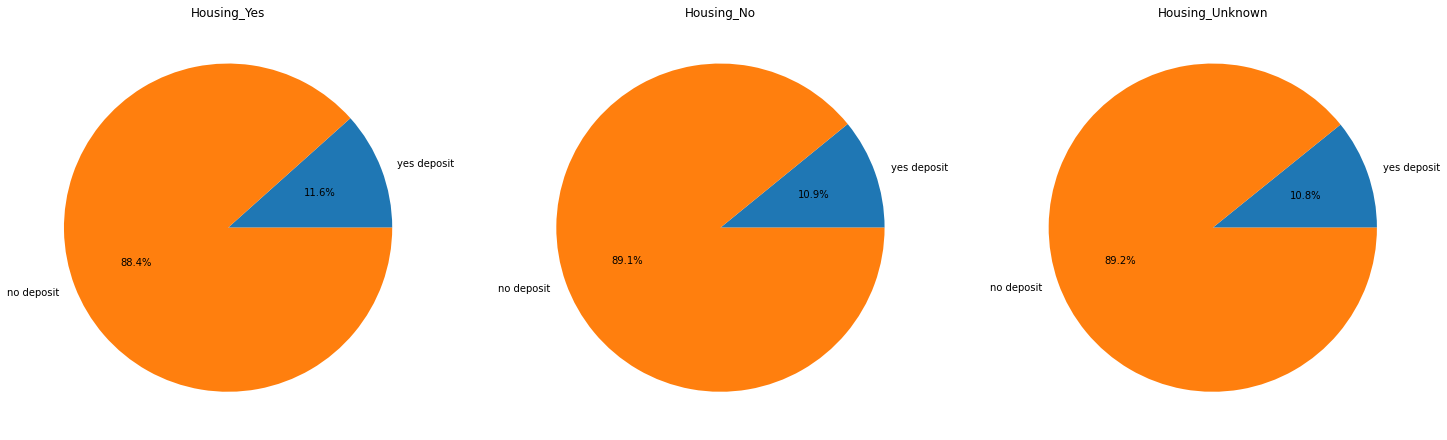

In [270]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(25,15))

axes[0].pie([housing['nilai_presentase_housing_vs_yes'][0],housing['nilai_presentase_housing_vs_no'][0]],labels=['yes deposit','no deposit'], autopct='%1.1f%%')
axes[0].set_title('Housing_Yes')

axes[1].pie([housing['nilai_presentase_housing_vs_yes'][1],housing['nilai_presentase_housing_vs_no'][1]],labels=['yes deposit','no deposit'], autopct='%1.1f%%')
axes[1].set_title('Housing_No')

axes[2].pie([housing['nilai_presentase_housing_vs_yes'][2],housing['nilai_presentase_housing_vs_no'][2]],labels=['yes deposit','no deposit'], autopct='%1.1f%%')
axes[2].set_title('Housing_Unknown')

plt.show()

##Loan

### Loan Value Analysis

In [271]:
index_loan = df1['loan'].value_counts().index.tolist()
value_loan = []
for i in range(0,len(index_loan),1):
  value_loan.append(df1['loan'].value_counts()[i])

In [272]:
value_loan

[33950, 6248, 990]

In [273]:
value_count_loan_no = []
for i in range(0,len(index_loan),1):
  value_count_loan_no.append(len(df1[(df1['loan'] == index_loan[i]) & (df1['y'] == 'no')]))

In [274]:
value_count_loan_no

[30100, 5565, 883]

In [275]:
value_count_loan_yes = []
for i in range(0,len(index_loan),1):
  value_count_loan_yes.append(len(df1[(df1['loan'] == index_loan[i]) & (df1['y'] == 'yes')]))

In [276]:
value_count_loan_yes

[3850, 683, 107]

In [277]:
data_loan = {'nama_loan': index_loan,'nilai_loan':value_loan,
            'nilai_loan_yes':value_count_loan_yes,
            'nilai_loan_no':value_count_loan_no}
loan = pd.DataFrame(data_loan)

In [278]:
loan

,nama_loan,nilai_loan,nilai_loan_yes,nilai_loan_no
0,no,33950,3850,30100
1,yes,6248,683,5565
2,unknown,990,107,883


In [279]:
def presentase(loan,yes):
  presentase_value = []
  for i in range(0,len(loan),1):
    presentase_value.append(round(((yes[i]/loan[i])*100),4))
  return presentase_value

In [280]:
value_presentase_perloan_vs_loan_yes = presentase((loan['nilai_loan']),loan['nilai_loan_yes'])

In [281]:
loan['nilai_presentase_loan_vs_yes']= value_presentase_perloan_vs_loan_yes

In [282]:
value_presentase_perloan_vs_no = []
for i in loan.index:
  value_presentase_perloan_vs_no.append(100 - loan['nilai_presentase_loan_vs_yes'][i])

In [283]:
data_loan = {'nama_loan': index_loan,'nilai_loan':value_loan,
            'nilai_loan_yes':value_count_loan_yes,
            'nilai_loan_no':value_count_loan_no,
            'nilai_presentase_loan_vs_yes':value_presentase_perloan_vs_loan_yes,
            'nilai_presentase_loan_vs_no':value_presentase_perloan_vs_no}

In [284]:
loan = pd.DataFrame(data_loan)

In [285]:
loan

,nama_loan,nilai_loan,nilai_loan_yes,nilai_loan_no,nilai_presentase_loan_vs_yes,nilai_presentase_loan_vs_no
0,no,33950,3850,30100,11.3402,88.6598
1,yes,6248,683,5565,10.9315,89.0685
2,unknown,990,107,883,10.8081,89.1919


###Piechart Loan

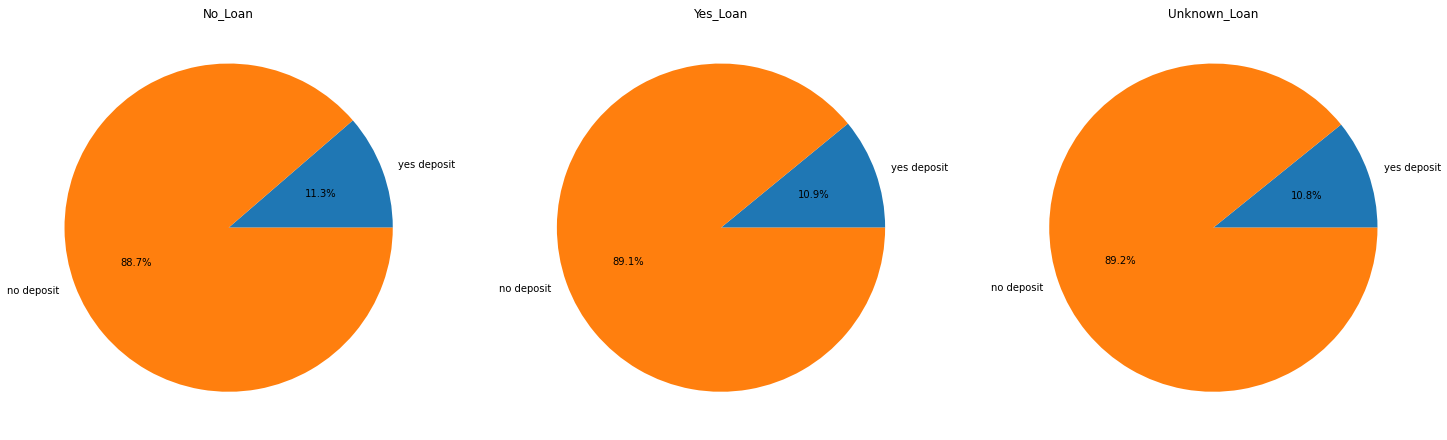

In [375]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(25,15))

axes[0].pie([loan['nilai_presentase_loan_vs_yes'][0],loan['nilai_presentase_loan_vs_no'][0]],labels=['yes deposit','no deposit'], autopct='%1.1f%%')
axes[0].set_title('No_Loan')

axes[1].pie([loan['nilai_presentase_loan_vs_yes'][1],loan['nilai_presentase_loan_vs_no'][1]],labels=['yes deposit','no deposit'], autopct='%1.1f%%')
axes[1].set_title('Yes_Loan')

axes[2].pie([loan['nilai_presentase_loan_vs_yes'][2],loan['nilai_presentase_loan_vs_no'][2]],labels=['yes deposit','no deposit'], autopct='%1.1f%%')
axes[2].set_title('Unknown_Loan')

plt.show()

##Contact

### Contact Analysis Value

In [287]:
index_contact = df1['contact'].value_counts().index.tolist()
value_contact = []
for i in range(0,len(index_contact),1):
  value_contact.append(df1['contact'].value_counts()[i])

In [288]:
value_contact

[26144, 15044]

In [289]:
value_count_contact_no = []
for i in range(0,len(index_contact),1):
  value_count_contact_no.append(len(df1[(df1['contact'] == index_contact[i]) & (df1['y'] == 'no')]))

In [290]:
value_count_contact_no

[22291, 14257]

In [291]:
value_count_contact_yes = []
for i in range(0,len(index_contact),1):
  value_count_contact_yes.append(len(df1[(df1['contact'] == index_contact[i]) & (df1['y'] == 'yes')]))

In [292]:
value_count_contact_yes

[3853, 787]

In [293]:
data_contact = {'nama_contact': index_contact,'nilai_contact':value_contact,
            'nilai_contact_yes':value_count_contact_yes,
            'nilai_contact_no':value_count_contact_no}
contact = pd.DataFrame(data_contact)

In [294]:
contact

,nama_contact,nilai_contact,nilai_contact_yes,nilai_contact_no
0,cellular,26144,3853,22291
1,telephone,15044,787,14257


In [295]:
def presentase(contact,yes):
  presentase_value = []
  for i in range(0,len(contact),1):
    presentase_value.append(round(((yes[i]/contact[i])*100),4))
  return presentase_value

In [296]:
value_presentase_percontact_vs_contact_yes = presentase((contact['nilai_contact']),contact['nilai_contact_yes'])

In [297]:
contact['nilai_presentase_contact_vs_yes']= value_presentase_percontact_vs_contact_yes

In [298]:
value_presentase_percontact_vs_no = []
for i in contact.index:
  value_presentase_percontact_vs_no.append(100 - contact['nilai_presentase_contact_vs_yes'][i])

In [299]:
data_contact = {'nama_contact': index_contact,'nilai_contact':value_contact,
            'nilai_contact_yes':value_count_contact_yes,
            'nilai_contact_no':value_count_contact_no,
            'nilai_presentase_contact_vs_yes':value_presentase_percontact_vs_contact_yes,
            'nilai_presentase_contact_vs_no':value_presentase_percontact_vs_no}

In [300]:
contact = pd.DataFrame(data_contact)

In [301]:
contact

,nama_contact,nilai_contact,nilai_contact_yes,nilai_contact_no,nilai_presentase_contact_vs_yes,nilai_presentase_contact_vs_no
0,cellular,26144,3853,22291,14.7376,85.2624
1,telephone,15044,787,14257,5.2313,94.7687


###Piechart Contact

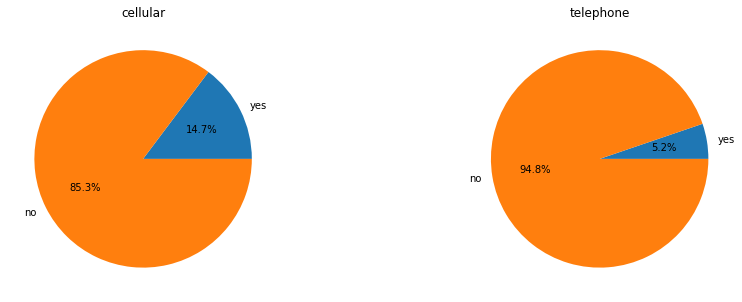

In [302]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

axes[0].pie([contact['nilai_presentase_contact_vs_yes'][0],contact['nilai_presentase_contact_vs_no'][0]],labels=['yes','no'], autopct='%1.1f%%')
axes[0].set_title('cellular')

axes[1].pie([contact['nilai_presentase_contact_vs_yes'][1],contact['nilai_presentase_contact_vs_no'][1]],labels=['yes','no'], autopct='%1.1f%%')
axes[1].set_title('telephone')

plt.show()

##Month

### Month Analysis Value

In [376]:
index_month = df1['month'].value_counts().index.tolist()
value_month = []
for i in range(0,len(index_month),1):
  value_month.append(df1['month'].value_counts()[i])

In [377]:
value_month

[13769, 7174, 6178, 5318, 4101, 2632, 718, 570, 546, 182]

In [378]:
value_count_month_no = []
for i in range(0,len(index_month),1):
  value_count_month_no.append(len(df1[(df1['month'] == index_month[i]) & (df1['y'] == 'no')]))

In [379]:
value_count_month_no

[12883, 6525, 5523, 4759, 3685, 2093, 403, 314, 270, 93]

In [380]:
value_count_month_yes = []
for i in range(0,len(index_month),1):
  value_count_month_yes.append(len(df1[(df1['month'] == index_month[i]) & (df1['y'] == 'yes')]))

In [381]:
value_count_month_yes

[886, 649, 655, 559, 416, 539, 315, 256, 276, 89]

In [382]:
data_month = {'nama_month': index_month,'nilai_month':value_month,
            'nilai_month_yes':value_count_month_yes,
            'nilai_month_no':value_count_month_no}
month = pd.DataFrame(data_month)

In [383]:
month

,nama_month,nilai_month,nilai_month_yes,nilai_month_no
0,may,13769,886,12883
1,jul,7174,649,6525
2,aug,6178,655,5523
3,jun,5318,559,4759
4,nov,4101,416,3685
5,apr,2632,539,2093
6,oct,718,315,403
7,sep,570,256,314
8,mar,546,276,270
9,dec,182,89,93


In [384]:
def presentase(month,yes):
  presentase_value = []
  for i in range(0,len(month),1):
    presentase_value.append(round(((yes[i]/month[i])*100),4))
  return presentase_value

In [385]:
value_presentase_permonth_vs_month_yes = presentase((month['nilai_month']),month['nilai_month_yes'])

In [386]:
month['nilai_presentase_month_vs_yes']= value_presentase_permonth_vs_month_yes

In [387]:
value_presentase_permonth_vs_no = []
for i in month.index:
  value_presentase_permonth_vs_no.append(100 - month['nilai_presentase_month_vs_yes'][i])

In [388]:
data_month = {'nama_month': index_month,'nilai_month':value_month,
            'nilai_month_yes':value_count_month_yes,
            'nilai_month_no':value_count_month_no,
            'nilai_presentase_month_vs_yes':value_presentase_permonth_vs_month_yes,
            'nilai_presentase_month_vs_no':value_presentase_permonth_vs_no}

In [389]:
month = pd.DataFrame(data_month)

In [390]:
month

,nama_month,nilai_month,nilai_month_yes,nilai_month_no,nilai_presentase_month_vs_yes,nilai_presentase_month_vs_no
0,may,13769,886,12883,6.4347,93.5653
1,jul,7174,649,6525,9.0466,90.9534
2,aug,6178,655,5523,10.6021,89.3979
3,jun,5318,559,4759,10.5115,89.4885
4,nov,4101,416,3685,10.1439,89.8561
5,apr,2632,539,2093,20.4787,79.5213
6,oct,718,315,403,43.8719,56.1281
7,sep,570,256,314,44.9123,55.0877
8,mar,546,276,270,50.5495,49.4505
9,dec,182,89,93,48.9011,51.0989


###Piechart Month

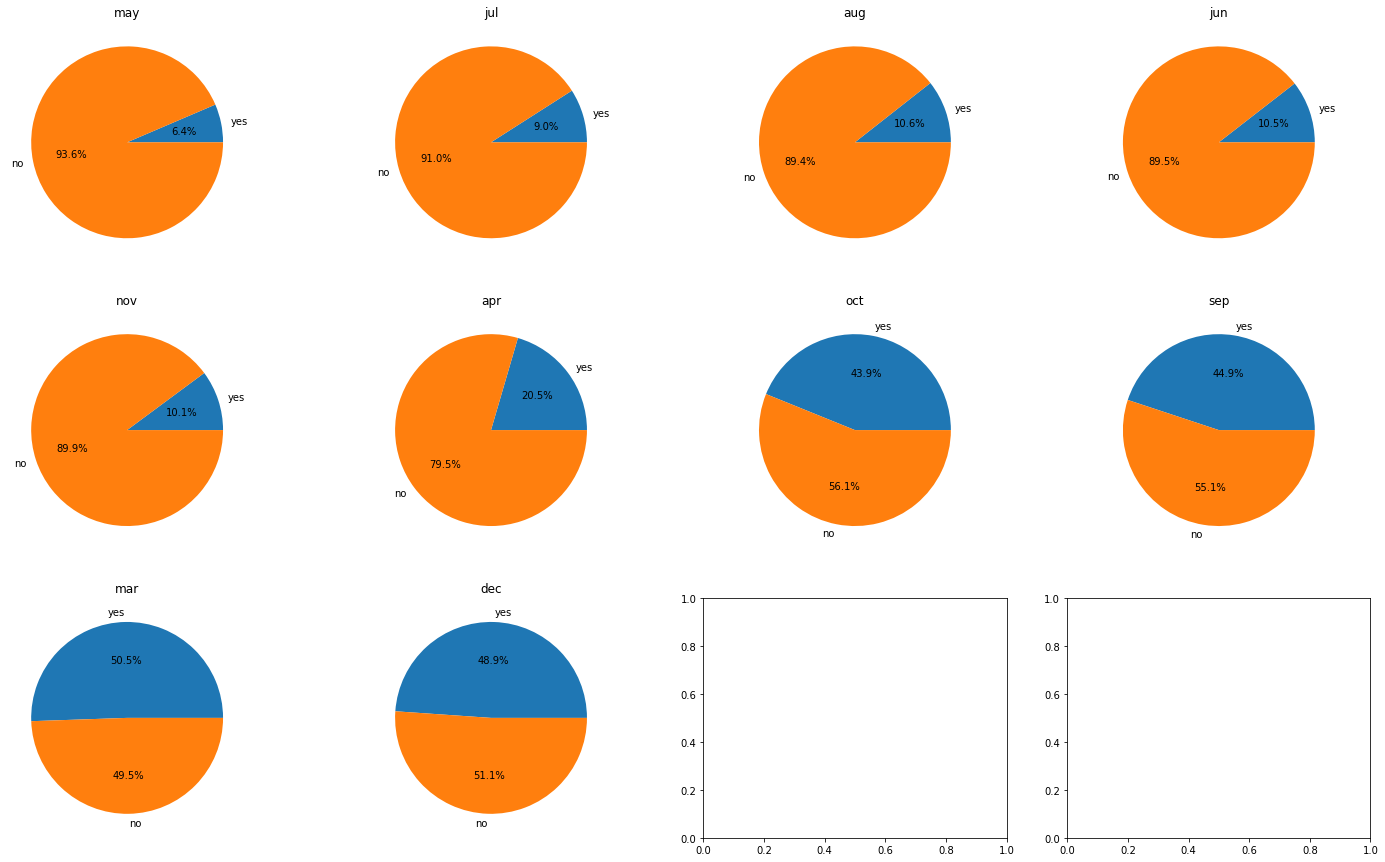

In [392]:
fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(25,15))

axes[0,0].pie([month['nilai_presentase_month_vs_yes'][0],month['nilai_presentase_month_vs_no'][0]],labels=['yes','no'], autopct='%1.1f%%')
axes[0,0].set_title(month['nama_month'][0])

axes[0,1].pie([month['nilai_presentase_month_vs_yes'][1],month['nilai_presentase_month_vs_no'][1]],labels=['yes','no'], autopct='%1.1f%%')
axes[0,1].set_title(month['nama_month'][1])

axes[0,2].pie([month['nilai_presentase_month_vs_yes'][2],month['nilai_presentase_month_vs_no'][2]],labels=['yes','no'], autopct='%1.1f%%')
axes[0,2].set_title(month['nama_month'][2])

axes[0,3].pie([month['nilai_presentase_month_vs_yes'][3],month['nilai_presentase_month_vs_no'][3]],labels=['yes','no'], autopct='%1.1f%%')
axes[0,3].set_title(month['nama_month'][3])

axes[1,0].pie([month['nilai_presentase_month_vs_yes'][4],month['nilai_presentase_month_vs_no'][4]],labels=['yes','no'], autopct='%1.1f%%')
axes[1,0].set_title(month['nama_month'][4])

axes[1,1].pie([month['nilai_presentase_month_vs_yes'][5],month['nilai_presentase_month_vs_no'][5]],labels=['yes','no'], autopct='%1.1f%%')
axes[1,1].set_title(month['nama_month'][5])

axes[1,2].pie([month['nilai_presentase_month_vs_yes'][6],month['nilai_presentase_month_vs_no'][6]],labels=['yes','no'], autopct='%1.1f%%')
axes[1,2].set_title(month['nama_month'][6])

axes[1,3].pie([month['nilai_presentase_month_vs_yes'][7],month['nilai_presentase_month_vs_no'][7]],labels=['yes','no'], autopct='%1.1f%%')
axes[1,3].set_title(month['nama_month'][7])

axes[2,0].pie([month['nilai_presentase_month_vs_yes'][8],month['nilai_presentase_month_vs_no'][8]],labels=['yes','no'], autopct='%1.1f%%')
axes[2,0].set_title(month['nama_month'][8])

axes[2,1].pie([month['nilai_presentase_month_vs_yes'][9],month['nilai_presentase_month_vs_no'][9]],labels=['yes','no'], autopct='%1.1f%%')
axes[2,1].set_title(month['nama_month'][9])



plt.show()

##Day_of_week

### Day of Week analysis value

In [319]:
index_day_of_week = df1['day_of_week'].value_counts().index.tolist()
value_day_of_week = []
for i in range(0,len(index_day_of_week),1):
  value_day_of_week.append(df1['day_of_week'].value_counts()[i])

In [320]:
value_day_of_week

[8623, 8514, 8134, 8090, 7827]

In [321]:
value_count_day_of_week_no = []
for i in range(0,len(index_day_of_week),1):
  value_count_day_of_week_no.append(len(df1[(df1['day_of_week'] == index_day_of_week[i]) & (df1['y'] == 'no')]))

In [322]:
value_count_day_of_week_no

[7578, 7667, 7185, 7137, 6981]

In [323]:
value_count_day_of_week_yes = []
for i in range(0,len(index_day_of_week),1):
  value_count_day_of_week_yes.append(len(df1[(df1['day_of_week'] == index_day_of_week[i]) & (df1['y'] == 'yes')]))

In [324]:
value_count_day_of_week_yes

[1045, 847, 949, 953, 846]

In [325]:
data_day_of_week = {'nama_day_of_week': index_day_of_week,'nilai_day_of_week':value_day_of_week,
            'nilai_day_of_week_yes':value_count_day_of_week_yes,
            'nilai_day_of_week_no':value_count_day_of_week_no}
day_of_week = pd.DataFrame(data_day_of_week)

In [326]:
day_of_week

,nama_day_of_week,nilai_day_of_week,nilai_day_of_week_yes,nilai_day_of_week_no
0,thu,8623,1045,7578
1,mon,8514,847,7667
2,wed,8134,949,7185
3,tue,8090,953,7137
4,fri,7827,846,6981


In [327]:
def presentase(day_of_week,yes):
  presentase_value = []
  for i in range(0,len(day_of_week),1):
    presentase_value.append(round(((yes[i]/day_of_week[i])*100),4))
  return presentase_value

In [328]:
value_presentase_perday_of_week_vs_day_of_week_yes = presentase((day_of_week['nilai_day_of_week']),day_of_week['nilai_day_of_week_yes'])

In [329]:
day_of_week['nilai_presentase_day_of_week_vs_yes']= value_presentase_perday_of_week_vs_day_of_week_yes

In [330]:
value_presentase_perday_of_week_vs_no = []
for i in day_of_week.index:
  value_presentase_perday_of_week_vs_no.append(100 - day_of_week['nilai_presentase_day_of_week_vs_yes'][i])

In [331]:
data_day_of_week = {'nama_day_of_week': index_day_of_week,'nilai_day_of_week':value_day_of_week,
            'nilai_day_of_week_yes':value_count_day_of_week_yes,
            'nilai_day_of_week_no':value_count_day_of_week_no,
            'nilai_presentase_day_of_week_vs_yes':value_presentase_perday_of_week_vs_day_of_week_yes,
            'nilai_presentase_day_of_week_vs_no':value_presentase_perday_of_week_vs_no}

In [332]:
day_of_week = pd.DataFrame(data_day_of_week)

In [333]:
day_of_week

,nama_day_of_week,nilai_day_of_week,nilai_day_of_week_yes,nilai_day_of_week_no,nilai_presentase_day_of_week_vs_yes,nilai_presentase_day_of_week_vs_no
0,thu,8623,1045,7578,12.1188,87.8812
1,mon,8514,847,7667,9.9483,90.0517
2,wed,8134,949,7185,11.6671,88.3329
3,tue,8090,953,7137,11.7800,88.2200
4,fri,7827,846,6981,10.8087,89.1913


###Piechart day_of_week

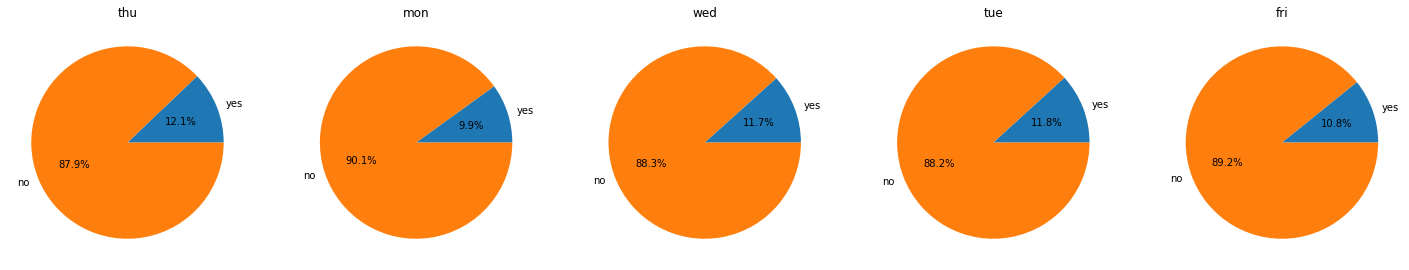

In [393]:
fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(25,15))

axes[0].pie([day_of_week['nilai_presentase_day_of_week_vs_yes'][0],day_of_week['nilai_presentase_day_of_week_vs_no'][0]],labels=['yes','no'], autopct='%1.1f%%')
axes[0].set_title(day_of_week['nama_day_of_week'][0])

axes[1].pie([day_of_week['nilai_presentase_day_of_week_vs_yes'][1],day_of_week['nilai_presentase_day_of_week_vs_no'][1]],labels=['yes','no'], autopct='%1.1f%%')
axes[1].set_title(day_of_week['nama_day_of_week'][1])

axes[2].pie([day_of_week['nilai_presentase_day_of_week_vs_yes'][2],day_of_week['nilai_presentase_day_of_week_vs_no'][2]],labels=['yes','no'], autopct='%1.1f%%')
axes[2].set_title(day_of_week['nama_day_of_week'][2])

axes[3].pie([day_of_week['nilai_presentase_day_of_week_vs_yes'][3],day_of_week['nilai_presentase_day_of_week_vs_no'][3]],labels=['yes','no'], autopct='%1.1f%%')
axes[3].set_title(day_of_week['nama_day_of_week'][3])

axes[4].pie([day_of_week['nilai_presentase_day_of_week_vs_yes'][4],day_of_week['nilai_presentase_day_of_week_vs_no'][4]],labels=['yes','no'], autopct='%1.1f%%')
axes[4].set_title(day_of_week['nama_day_of_week'][4])




plt.show()

##poutcome

### POutcome Analysis Value

In [335]:
index_poutcome = df1['poutcome'].value_counts().index.tolist()
value_poutcome = []
for i in range(0,len(index_poutcome),1):
  value_poutcome.append(df1['poutcome'].value_counts()[i])

In [336]:
value_poutcome

[35563, 4252, 1373]

In [337]:
value_count_poutcome_no = []
for i in range(0,len(index_poutcome),1):
  value_count_poutcome_no.append(len(df1[(df1['poutcome'] == index_poutcome[i]) & (df1['y'] == 'no')]))

In [338]:
value_count_poutcome_no

[32422, 3647, 479]

In [339]:
value_count_poutcome_yes = []
for i in range(0,len(index_poutcome),1):
  value_count_poutcome_yes.append(len(df1[(df1['poutcome'] == index_poutcome[i]) & (df1['y'] == 'yes')]))

In [340]:
value_count_poutcome_yes

[3141, 605, 894]

In [341]:
data_poutcome = {'nama_poutcome': index_poutcome,'nilai_poutcome':value_poutcome,
            'nilai_poutcome_yes':value_count_poutcome_yes,
            'nilai_poutcome_no':value_count_poutcome_no}
poutcome = pd.DataFrame(data_poutcome)

In [342]:
poutcome

,nama_poutcome,nilai_poutcome,nilai_poutcome_yes,nilai_poutcome_no
0,nonexistent,35563,3141,32422
1,failure,4252,605,3647
2,success,1373,894,479


In [343]:
def presentase(poutcome,yes):
  presentase_value = []
  for i in range(0,len(poutcome),1):
    presentase_value.append(round(((yes[i]/poutcome[i])*100),4))
  return presentase_value

In [344]:
value_presentase_perpoutcome_vs_poutcome_yes = presentase((poutcome['nilai_poutcome']),poutcome['nilai_poutcome_yes'])

In [345]:
poutcome['nilai_presentase_poutcome_vs_yes']= value_presentase_perpoutcome_vs_poutcome_yes

In [346]:
value_presentase_perpoutcome_vs_no = []
for i in poutcome.index:
  value_presentase_perpoutcome_vs_no.append(100 - poutcome['nilai_presentase_poutcome_vs_yes'][i])

In [347]:
data_poutcome = {'nama_poutcome': index_poutcome,'nilai_poutcome':value_poutcome,
            'nilai_poutcome_yes':value_count_poutcome_yes,
            'nilai_poutcome_no':value_count_poutcome_no,
            'nilai_presentase_poutcome_vs_yes':value_presentase_perpoutcome_vs_poutcome_yes,
            'nilai_presentase_poutcome_vs_no':value_presentase_perpoutcome_vs_no}

In [348]:
poutcome = pd.DataFrame(data_poutcome)

In [349]:
poutcome

,nama_poutcome,nilai_poutcome,nilai_poutcome_yes,nilai_poutcome_no,nilai_presentase_poutcome_vs_yes,nilai_presentase_poutcome_vs_no
0,nonexistent,35563,3141,32422,8.8322,91.1678
1,failure,4252,605,3647,14.2286,85.7714
2,success,1373,894,479,65.1129,34.8871


###Piechart poutcome

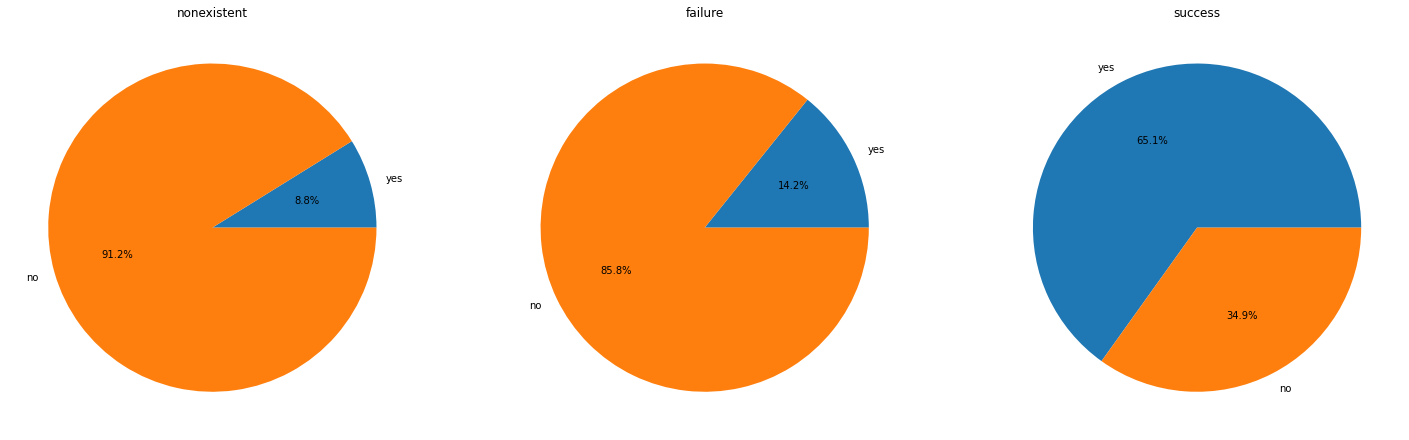

In [350]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(25,15))

axes[0].pie([poutcome['nilai_presentase_poutcome_vs_yes'][0],poutcome['nilai_presentase_poutcome_vs_no'][0]],labels=['yes','no'], autopct='%1.1f%%')
axes[0].set_title('nonexistent')

axes[1].pie([poutcome['nilai_presentase_poutcome_vs_yes'][1],poutcome['nilai_presentase_poutcome_vs_no'][1]],labels=['yes','no'], autopct='%1.1f%%')
axes[1].set_title('failure')

axes[2].pie([poutcome['nilai_presentase_poutcome_vs_yes'][2],poutcome['nilai_presentase_poutcome_vs_no'][2]],labels=['yes','no'], autopct='%1.1f%%')
axes[2].set_title('success')

plt.show()

## Age Classification

### Age Analysis Value

In [351]:
df_age = df[['y','age']]
conditions= [(df_age['age'] >6) & (df_age['age'] <=22),
             (df_age['age'] >22) & (df_age['age'] <=38),
             (df_age['age'] >38) & (df_age['age'] <=54),
             (df_age['age'] >54) & (df_age['age'] <=73),
             (df_age['age'] >73)]
values = ['Gen Z','Millenials','Gen x','Boomers','Silent Gen']
df_age['group_age']=np.select(conditions,values)
df_age.head()

,y,age,group_age
0,no,56,Boomers
1,no,57,Boomers
2,no,37,Millenials
3,no,40,Gen x
4,no,56,Boomers


[Text(0, 0, 'Boomers'),
 Text(0, 0, 'Millenials'),
 Text(0, 0, 'Gen x'),
 Text(0, 0, 'Gen Z'),
 Text(0, 0, 'Silent Gen')]

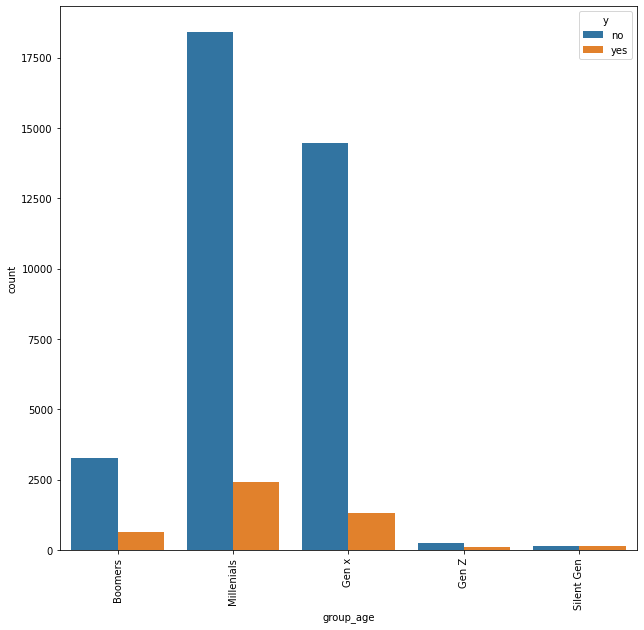

In [352]:
plt.figure(figsize = (60, 10))
ax4 = plt.subplot(1,5,4)
sns.countplot(df_age['group_age'],hue=df['y'])
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)

In [353]:
df_age_w_dep = df_age[df_age['y']=='yes']
df_age_wo_dep = df_age[df_age['y']=='no']

In [354]:
index_age = df_age['group_age'].value_counts().index.tolist()
value_age = []
for i in range(0,len(index_age),1):
  value_age.append(df_age['group_age'].value_counts()[i])

In [355]:
value_count_age_no = []
for i in range(0,len(index_age),1):
  value_count_age_no.append(len(df_age[(df_age['group_age'] == index_age[i]) & (df_age['y'] == 'no')]))

In [356]:
value_count_age_no

[18395, 14463, 3287, 257, 146]

In [357]:
value_count_age_yes = []
for i in range(0,len(index_age),1):
  value_count_age_yes.append(len(df_age[(df_age['group_age'] == index_age[i]) & (df_age['y'] == 'yes')]))

In [358]:
value_count_age_yes

[2401, 1320, 642, 122, 155]

In [359]:
value_age

[20796, 15783, 3929, 379, 301]

In [360]:
data_age = {'nama_age': index_age,'nilai_age':value_age,
            'nilai_age_yes':value_count_age_yes,
            'nilai_age_no':value_count_age_no}
age = pd.DataFrame(data_age)

In [361]:
age

,nama_age,nilai_age,nilai_age_yes,nilai_age_no
0,Millenials,20796,2401,18395
1,Gen x,15783,1320,14463
2,Boomers,3929,642,3287
3,Gen Z,379,122,257
4,Silent Gen,301,155,146


### Piechart Age

Text(0.5, 1.0, 'Silent Gen')

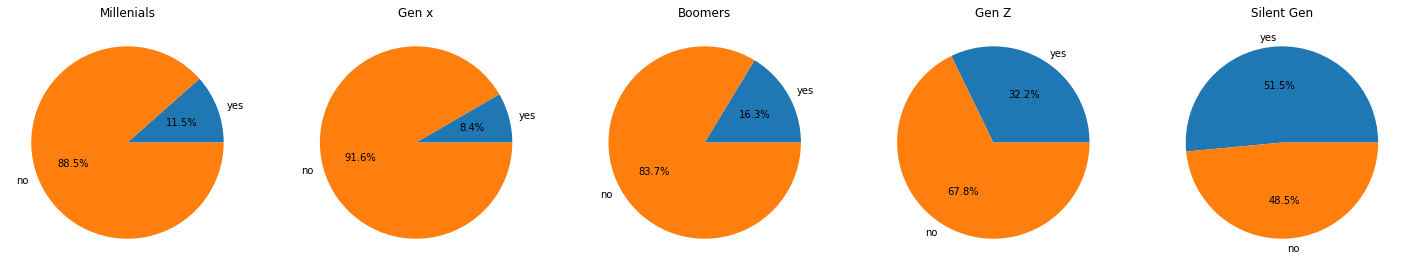

In [362]:
fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(25,15))

axes[0].pie([age['nilai_age_yes'][0],age['nilai_age_no'][0]],labels=['yes','no'], autopct='%1.1f%%')
axes[0].set_title('Millenials')

axes[1].pie([age['nilai_age_yes'][1],age['nilai_age_no'][1]],labels=['yes','no'], autopct='%1.1f%%')
axes[1].set_title('Gen x')

axes[2].pie([age['nilai_age_yes'][2],age['nilai_age_no'][2]],labels=['yes','no'], autopct='%1.1f%%')
axes[2].set_title('Boomers')

axes[3].pie([age['nilai_age_yes'][3],age['nilai_age_no'][3]],labels=['yes','no'], autopct='%1.1f%%')
axes[3].set_title('Gen Z')

axes[4].pie([age['nilai_age_yes'][4],age['nilai_age_no'][4]],labels=['yes','no'], autopct='%1.1f%%')
axes[4].set_title('Silent Gen')

# Identify Missing Value,outliers,anomaly & duplicates

## Outliers

Outliers for numerical data

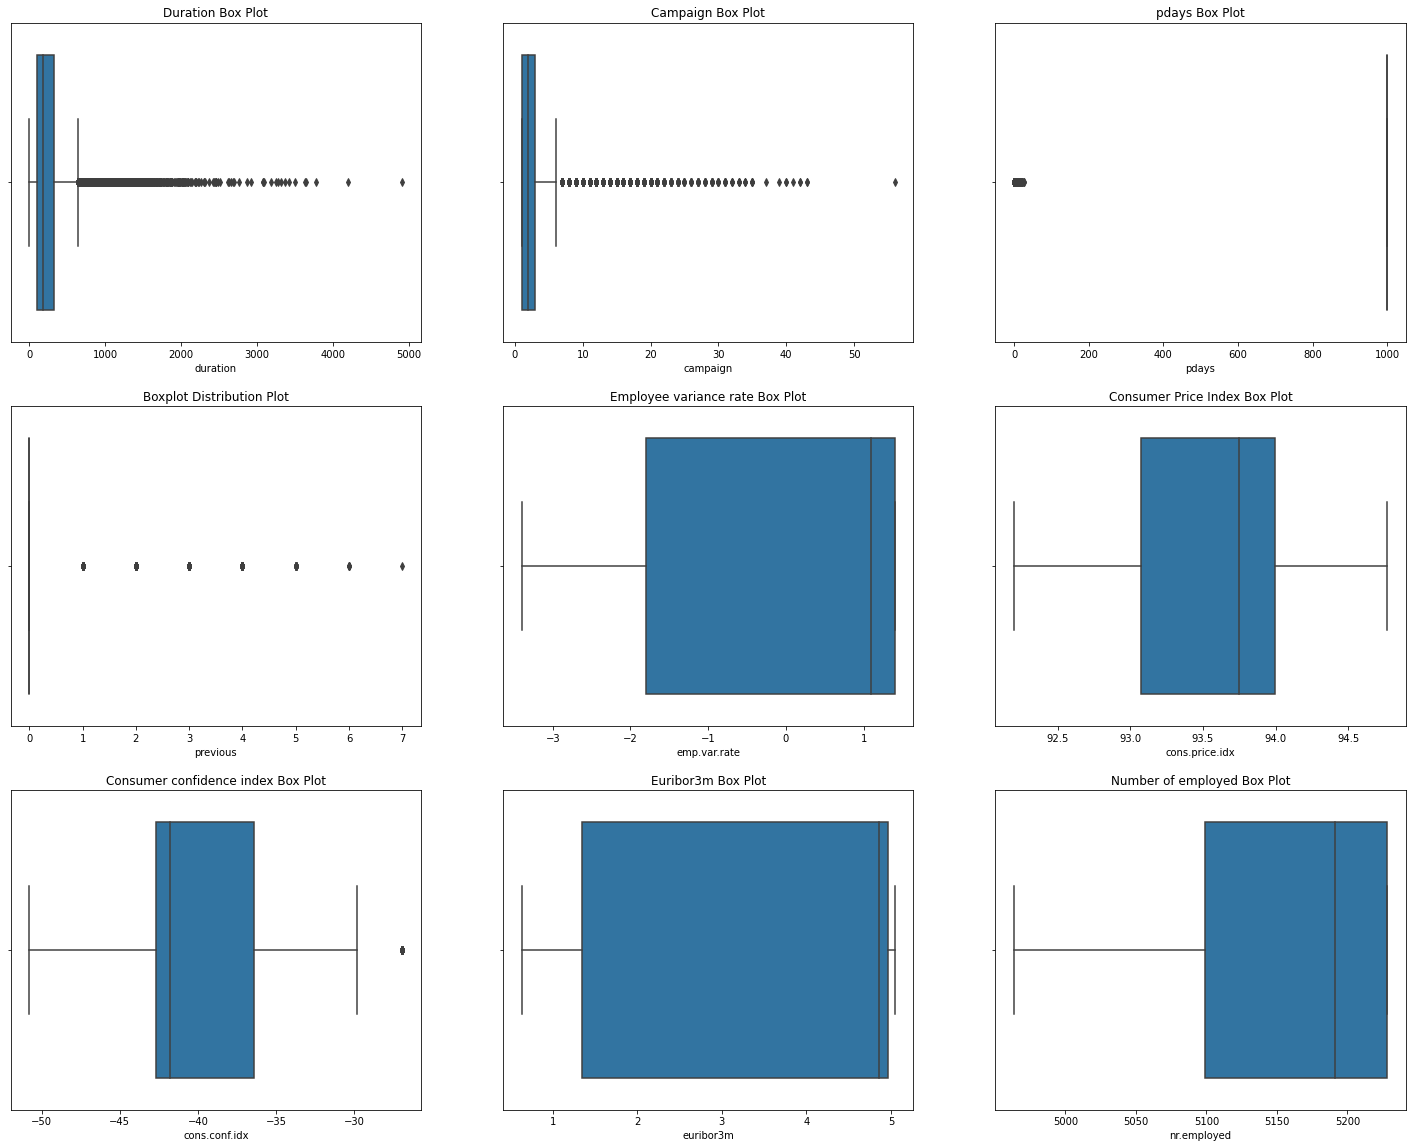

In [363]:
plt.figure(figsize=(25, 20))
plt.subplot(3,3,1)
sns.boxplot(df.duration)
plt.title('Duration Box Plot')

plt.subplot(3,3,2)
sns.boxplot(df.campaign)
plt.title('Campaign Box Plot')

plt.subplot(3,3,3)
sns.boxplot(df['pdays'])
plt.title('pdays Box Plot')

plt.subplot(3,3,4)
sns.boxplot(df['previous'])
plt.title('Boxplot Distribution Plot')

plt.subplot(3,3,5)
sns.boxplot(df['emp.var.rate'])
plt.title('Employee variance rate Box Plot')

plt.subplot(3,3,6)
sns.boxplot(df['cons.price.idx'])
plt.title('Consumer Price Index Box Plot')

plt.subplot(3,3,7)
sns.boxplot(df['cons.conf.idx'])
plt.title('Consumer confidence index Box Plot')

plt.subplot(3,3,8)
sns.boxplot(df['euribor3m'])
plt.title('Euribor3m Box Plot')

plt.subplot(3,3,9)
sns.boxplot(df['nr.employed'])
plt.title('Number of employed Box Plot')

plt.show()

In [364]:
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
       age          job   marital  ... euribor3m nr.employed    y
1266    39  blue-collar   married  ...     4.855      5191.0   no
12261   36      retired   married  ...     4.966      5228.1   no
14234   27   technician    single  ...     4.962      5228.1   no
16956   47   technician  divorced  ...     4.962      5228.1   no
18465   32   technician    single  ...     4.968      5228.1   no
20216   55     services   married  ...     4.965      5228.1   no
20534   41   technician   married  ...     4.966      5228.1   no
25217   39       admin.   married  ...     4.153      5195.8   no
28477   24     services    single  ...     1.423      5099.1   no
32516   35       admin.   married  ...     1.313      5099.1   no
36951   45       admin.   married  ...     1.072      5076.2  yes
38281   71      retired    single  ...     0.742      5017.5   no

[12 rows x 21 columns]


bandingin data duplicate

## Missing Value

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [366]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [367]:
print('Count of Job Unknown value : ',df[df.job == 'unknown'].shape[0])
print('Count of Marital Unknown value : ',df[df.marital == 'unknown'].shape[0])
print('Count of Education Unknown value : ',df[df.education == 'unknown'].shape[0])
print('Count of Default Unknown value : ',df[df.default == 'unknown'].shape[0])
print('Count of Housing Unknown value : ',df[df.housing == 'unknown'].shape[0])
print('Count of Loan Unknown value : ',df[df.loan == 'unknown'].shape[0])
print('Count of Contact Unknown value : ',df[df.contact == 'unknown'].shape[0])
print('Count of Month Unknown value : ',df[df.month == 'unknown'].shape[0])
print('Count of days of week Unknown value : ',df[df.day_of_week == 'unknown'].shape[0])
print('Count of previous Unknown value : ',df[df.previous == 'unknown'].shape[0])
print('Count of poutcome Unknown value : ',df[df.poutcome == 'unknown'].shape[0])

Count of Job Unknown value :  330
Count of Marital Unknown value :  80
Count of Education Unknown value :  1731
Count of Default Unknown value :  8597
Count of Housing Unknown value :  990
Count of Loan Unknown value :  990
Count of Contact Unknown value :  0
Count of Month Unknown value :  0
Count of days of week Unknown value :  0
Count of previous Unknown value :  0
Count of poutcome Unknown value :  0


In [368]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

## Duplicate Value

Kesimpulan : hampir semua feature memiliki data outliers. Hal ini kemungkinan disebabkan oleh data yang imbalance.

untuk yg outliers hanya digunakan base rule. Untuk data training cukup hilangin jumlah row nya.

# Insight

1. Pada categorical data terdapat beberapa data yang kurang mempunyai perbedaan yang significant antara kategori 1 dengan yang lainnya yaitu Marital, housing, loan dan day of week

2. Categorical data yang mempunyai perbedaan significant dengan kategori 1 dengan yang lainnya adalah:
*   Job: Diketahui student mempunyai chance 31,% untuk deposit, retired mempunyai chance 25% dan diikuti oleh admin sebesar 14,2 %
*   Education: Illiterate mempunyai chance 22,2 % untuk deposit. unknown 15% dan university defree 13,7%
* Contact: Metode contact yang terbaik adalah celluar dengan chance 14,7% customer deposit
* Month: Bulan-bulan dengan chance untuk deposit yang besar adalah Mar (50,5%), Dec (48,9%), Sep (44,9%), Oct(43,9%)
* Poutcome: Outcome dari campaign marketing sangat menentukan chance customer deposit karena jika berhasil maka terdapat chance 65,1% deposit, 
kemudian dengan adanya campaign marketing maka chance untuk deposit akan lebih baik dibandingkan tidak ada campaign sama sekali

3. Feature default tidak akan digunakan karena proporsi value-nya memiliki imbalancy data yang sangat signifikan. Feature default memiliki 3 value, yes (3 rows), No(32588) dan unknown (8597). Jika tetap digunakan maka pada proses imbalance data handling, jumlah row yang dihilangkan akan terlalu banyak. Oleh karena itu diputuskan untuk tidak menggunakan feature default 

4. Untuk numerical data, hanya feature duration yang tidak akan di gunakan. Feature duration memiliki korelasi yang paling tinggi dengan target. Namun, data dari duration dapat diketahui apabila user sudah melakukan kontak dengan nasabah. Oleh karena itu, feature duration tidak akan digunakan supaya model yang dibuat lebih realistis.
